# Assignment2

## Cluster Your Data

### K-Means

In [1]:
from collections import Counter
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import multivariate_normal
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression

C:\Users\qiaoz\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
file = pd.read_csv('final.csv')
file = file[file.Global_Sales < 80]
file.head()

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.91,58.0,41.0,6.6,129.0,Nintendo,E
5,8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E


In [3]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
            colored_labels.append(colors[7])
        else:
            colored_labels.append(colors[label])
    return colored_labels

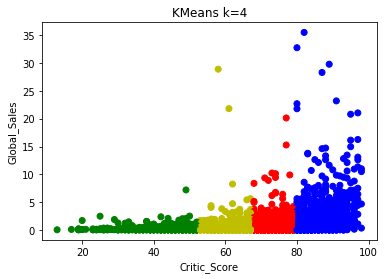

In [4]:
%matplotlib inline
file["tUser_Score"] = file["User_Score"]*10
estimator = KMeans(n_clusters = 4)
X = file[["Critic_Score","Global_Sales"]]
estimator.fit(X)
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(file["Critic_Score"],file['Global_Sales'], c=colors)
plt.title("KMeans k=4")
plt.xlabel("Critic_Score")
plt.ylabel("Global_Sales")
plt.show()

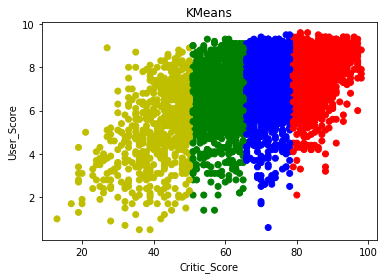

In [5]:
X = file[["Critic_Score","User_Score"]]
estimator = KMeans(n_clusters = 4)
estimator.fit(X)
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(file["Critic_Score"],file['User_Score'], c=colors)
plt.title("KMeans")
plt.xlabel("Critic_Score")
plt.ylabel("User_Score")
plt.show()

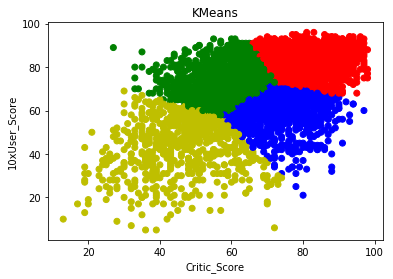

In [6]:
X = file[["Critic_Score","tUser_Score"]]
estimator = KMeans(n_clusters = 4)
estimator.fit(X)
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(file["Critic_Score"],file['tUser_Score'], c=colors)
plt.title("KMeans")
plt.xlabel("Critic_Score")
plt.ylabel("10xUser_Score")
plt.show()

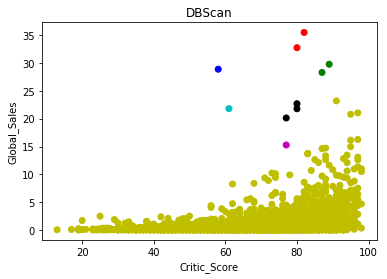

In [7]:
X = file[["Critic_Score","Global_Sales"]]
estimator = DBSCAN(eps=4.68, min_samples=0)
estimator.fit(X)
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(file["Critic_Score"],file['Global_Sales'], c=colors)
plt.title("DBScan")
plt.xlabel("Critic_Score")
plt.ylabel("Global_Sales")
plt.show()

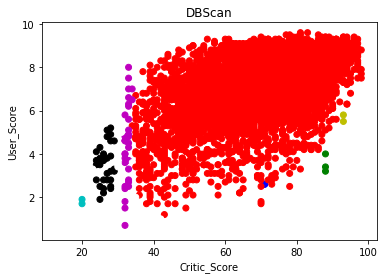

In [8]:
X = file[["Critic_Score","User_Score"]]
estimator = DBSCAN(eps=1, min_samples=2)
estimator.fit(X)
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(file["Critic_Score"],file['User_Score'], c=colors)
plt.title("DBScan")
plt.xlabel("Critic_Score")
plt.ylabel("User_Score")
plt.show()

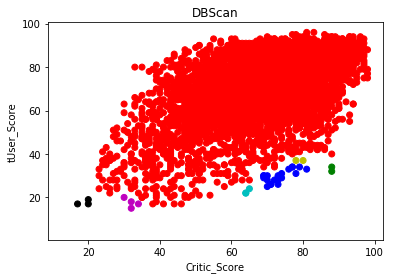

In [9]:
X = file[["Critic_Score","tUser_Score"]]
estimator = DBSCAN(eps=3, min_samples=2)
estimator.fit(X)
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(file["Critic_Score"],file['tUser_Score'], c=colors)
plt.title("DBScan")
plt.xlabel("Critic_Score")
plt.ylabel("tUser_Score")
plt.show()

### Do the clustering methods generate the same clusters? 

Different clustering methods generate different clusters. The result of clusters also influenced by parameters of the cluster methods.

### Does scaling effect the clustering? 

Yes, the scaling will effect the result of clustering.

### Does the clustering produce interesting groupings? 

No

## Generate a linear model for your data

In [10]:
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [11]:
Diff_model = ols("Critic_Score ~ tUser_Score", data=file).fit()
Diff_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     3464.
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        13:46:56   Log-Likelihood:                -26226.
No. Observations:                6824   AIC:                         5.246e+04
Df Residuals:                    6822   BIC:                         5.247e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      30.1102      0.696     43.265      0.000      28.746      31.474
tUser_Score     0.5589      0.009     58.854      0.000       0.540       0.578
==============================================================================
Omnibus:                      104.728   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.960
Skew:                          -0.289   Prob(JB):                     8.04e-25
Kurtosis:                       3.235   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

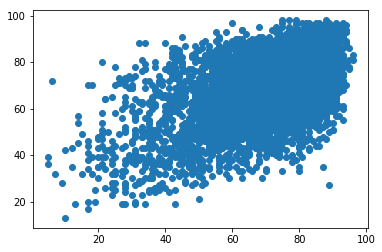

In [12]:
x = file[["tUser_Score"]]
y = file[["Critic_Score"]]
plt.plot(x,y,"o")

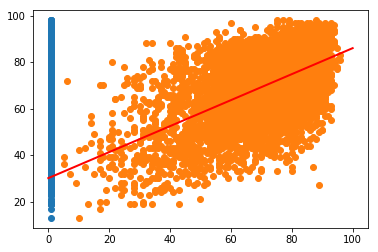

In [13]:
x = sm.add_constant(x)
plt.plot(x,y,"o")
x2 = np.linspace(0,100,100)
y2= (0.5589*x2) + 30.11
plt.plot(x2,y2,lw=2,color="r")
plt.show()

In [14]:
Diff_model = ols("Global_Sales ~ Critic_Score", data=file).fit()
Diff_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     545.7
Date:                Fri, 16 Feb 2018   Prob (F-statistic):          3.64e-116
Time:                        13:46:57   Log-Likelihood:                -13025.
No. Observations:                6824   AIC:                         2.605e+04
Df Residuals:                    6822   BIC:                         2.607e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.5732      0.102    -15.416      0.000      -1.773      -1.373
Critic_Score     0.0333      0.001     23.359      0.000       0.030       0.036
==============================================================================
Omnibus:                    10013.334   Durbin-Watson:                   0.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4446184.029
Skew:                           8.844   Prob(JB):                         0.00
Kurtosis:                     126.791   Cond. No.                         370.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

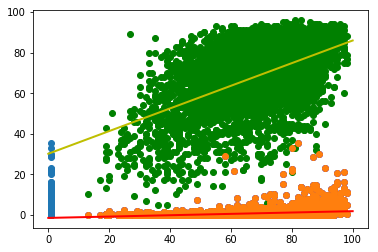

In [15]:
x = file[["Critic_Score"]]
y = file[["Global_Sales"]]
z = file[["tUser_Score"]]
plt.plot(x,y,"o",color="b")
plt.plot(x,z,"o", color="g")
x = sm.add_constant(x)
plt.plot(x,y,"o")
x2 = np.linspace(0,100,100)
y2= (0.0333*x2) -1.5732
y3= (0.5589*x2) + 30.11
plt.plot(x2,y2,lw=2,color="r")
plt.plot(x2,y3,lw=2,color="y")
plt.show()

In [16]:
file_2016 = file[file["Genre"] == "Role-Playing"]
Diff_model = ols("Global_Sales ~ tUser_Score + Critic_Score  - 1", data=file_2016).fit()
Diff_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     189.6
Date:                Fri, 16 Feb 2018   Prob (F-statistic):           1.03e-66
Time:                        13:46:57   Log-Likelihood:                -1107.7
No. Observations:                 712   AIC:                             2219.
Df Residuals:                     710   BIC:                             2229.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
tUser_Score     -0.0270      0.004     -7.334      0.000      -0.034      -0.020
Critic_Score     0.0383      0.004      9.992      0.000       0.031       0.046
==============================================================================
Omnibus:                      561.413   Durbin-Watson:                   0.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9315.852
Skew:                           3.530   Prob(JB):                         0.00
Kurtosis:                      19.254   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

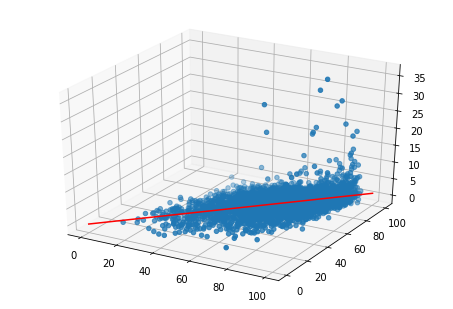

In [17]:
x = file[["Critic_Score"]]
y = file[["tUser_Score"]]
z = file[["Global_Sales"]]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x,y,z)
x2 = np.linspace(0,100,100)
y2 = np.linspace(0,100,100)

z2 = ((-0.02697*y2)+(0.0383*x2))
ax.plot(x2,y2,z2,c='r')
plt.show()

### Is the relationship significant?

There exits some relationship within global sales, critic score and user score, and is quite significant. It is quite clear from the graph that the higher the score is, the more possibility the global sales is higher.

### Are any model assumptions violated?

No, these conclusions are based on the model.

### Is there any multi-colinearity in the model?

Yes, according to the model Critic Score - User Score -> Global Sales, it's clear that the User Score is relevant to Critic Score, that means there are multi-colinearity between Critic Score and User Score.

### In the multiple regression models are predictor variables independent of all the other predictor variables?

No, the predictor variables is influenced by many factors shown in the below heatmap.

                 Global_Sales  Critic_Score  User_Score  Year_of_Release
Global_Sales         1.000000      0.405859    0.126086        -0.071965
Critic_Score         0.405859      1.000000    0.501530        -0.054046
User_Score           0.126086      0.501530    1.000000        -0.293225
Year_of_Release     -0.071965     -0.054046   -0.293225         1.000000


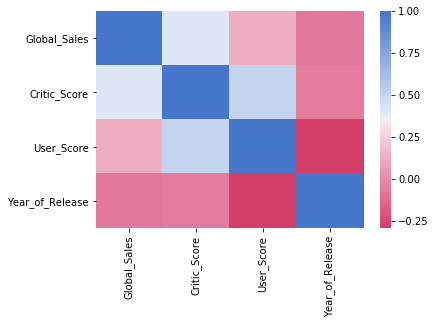

In [18]:
file['Genre'] = file['Genre'].astype('category')
file_Role_Playing = file[file['Genre']=="Role-Playing"]
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
correlations = file_Role_Playing[['Global_Sales', 'Critic_Score','User_Score', 'Year_of_Release']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

### In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.   

The most significant predictor is the Critic Score, the insignificant one is User Score.

### Does the model make sense?  

Partly, the Global sales is influenced by the critic score and user score and is examined in reality. Players tend to play those games in high scorer instead of low ones.

### Cross-validate the model. How well did it do?    

In [19]:
from sklearn.cross_validation import KFold
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

C:\Users\qiaoz\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
x = file[["tUser_Score"]]
y = file[["Critic_Score"]]
X_train, X_test,Y_train,Y_test = train_test_split(y,x)

In [21]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)
score = cross_val_score(regr,y,x,cv=5)
score

array([ 0.17551532,  0.25827759,  0.29574973,  0.35789808,  0.39022249])

In [22]:
print(score.mean())

0.29553264134


From the above, we can see that the result is not very ideal.The model fits rate is only about 30%, which is not very high but it still shows some interesting result.

### Does regularization help with creating models that validate better on out of sample data?  

Yes, by regularization of the user score, the answer has become much clearer and the relationship between user_score and critic_score is much stronger than before.

## Logistic Model

In [23]:
pred = ['Critic_Score','tUser_Score']
Sales = file[["Global_Sales"]]
Sales_norm = Sales / Sales.max()

In [24]:
model = sm.Logit(Sales_norm, file[pred]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.037354
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Global_Sales   No. Observations:                 6824
Model:                          Logit   Df Residuals:                     6822
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Feb 2018   Pseudo R-squ.:                 -0.2261
Time:                        13:47:07   Log-Likelihood:                -254.91
converged:                       True   LL-Null:                       -207.89
                                        LLR p-value:                     1.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Critic_Score    -0.0122      0.005     -2.556      0.011      -0.021      -0.003
tUser_Score     -0.0416      0.005     -8.534      0.000      -0.051      -0.032
================================================================================
"""

In [25]:
model.conf_int()

,0,1
Critic_Score,-0.021498,-0.002836
tUser_Score,-0.051192,-0.032071


In [26]:
model.conf_int(0.01)

,0,1
Critic_Score,-0.024430,0.000096
tUser_Score,-0.054197,-0.029066


In [27]:
np.exp(model.params)

Critic_Score    0.987907
tUser_Score     0.959223
dtype: float64

In [28]:
params = model.params
conf = model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

,2.5%,97.5%,OddsRatio
Critic_Score,0.978732,0.997168,0.987907
tUser_Score,0.950096,0.968438,0.959223


### Is the relationship significant? 

From the above, we can see the relationship is not very strong, the critic score and user score will influence the Global sales but the relationship based on logical regression is not very significant.

### Are any model assumptions violated?

No, these conclusions are based on the model.

### Cross-validate the model. How well did it do?  

In [29]:
X_train, X_test,Y_train,Y_test = train_test_split(y,x)
lr = LogisticRegression(C=1e9)
LRm = lr.fit(X_train,Y_train)
LRm.predict_proba(X_test)

C:\Users\qiaoz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[  1.11057673e-04,   2.20802147e-04,   2.28982730e-05, ...,
          1.11672947e-04,   2.68293799e-04,   1.65843493e-04],
       [  5.85823774e-05,   2.24939018e-04,   1.04937172e-05, ...,
          2.85875678e-04,   3.52994495e-04,   2.57627723e-04],
       [  2.26159319e-05,   2.18225453e-04,   3.32703923e-06, ...,
          1.00701064e-03,   4.89915109e-04,   4.51148302e-04],
       ..., 
       [  1.60358465e-04,   2.14806497e-04,   3.59754125e-05, ...,
          6.24984655e-05,   2.23868372e-04,   1.25255282e-04],
       [  7.59717426e-05,   2.24187492e-04,   1.43962787e-05, ...,
          1.97090005e-04,   3.17597795e-04,   2.16894326e-04],
       [  1.42071566e-04,   2.17084275e-04,   3.09885073e-05, ...,
          7.59438022e-05,   2.38119351e-04,   1.37729285e-04]])

In [30]:
LRm.decision_function(X_test)
LRm.predict(X_test)

array([ 78.,  78.,  78., ...,  78.,  78.,  78.])

In [31]:
k=5
acc=[]
for i in range(k):
    a=metrics.accuracy_score(Y_test, LRm.predict(X_test))
    acc.append(a)
print (acc)
print (np.mean(acc))
print (np.std(acc))

[0.046893317702227433, 0.046893317702227433, 0.046893317702227433, 0.046893317702227433, 0.046893317702227433]
0.0468933177022
0.0


The result is not very well, mostly are not correct and the accuracy is not very high and cannot be regarded as the prediction.